# Random Forest Regression of the defence of NFL teams through the 2018-21 seasons 


All modules and libraries imported. csv containing raw data from ProFootballReference.com is also imported and read by the pandas read function. This is defined
as df.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
from scipy import stats
from scipy.stats import rankdata
import seaborn as sns
df = pd.read_csv (r'C:\Users\Rob\Documents\2021stats.csv')
print (df)

                        Tm  Att   Yds   1D   YBC  YBC/Att   YAC  YAC/Att  \
0      Arizona Cardinals21  496  2076  127  1286      2.6   790      1.6   
1        Atlanta Falcons21  393  1451   75   811      2.1   640      1.6   
2       Baltimore Ravens21  517  2479  159  1579      3.1   900      1.7   
3          Buffalo Bills21  461  2209  134  1208      2.6  1001      2.2   
4      Carolina Panthers21  455  1842  117  1036      2.3   806      1.8   
..                     ...  ...   ...  ...   ...      ...   ...      ...   
91   San Francisco 49ers19  498  2305  110  1472      3.0   833      1.7   
92      Seattle Seahawks19  481  2200  121  1125      2.3  1075      2.2   
93  Tampa Bay Buccaneers19  409  1521   81   746      1.8   775      1.9   
94      Tennessee Titans19  445  2223  104   940      2.1  1283      2.9   
95   Washington Redskins19  356  1583   74   680      1.9   903      2.5   

    BrkTkl  Att/Br  ...  Ydsp   IAY  IAY/PA   CAY  CAY/Cmp  CAY/PA  YACp  \
0       28 

Finding the mean of all points allowed and added back to the df to use as the baseline later

In [2]:
np.mean(df['PF'])

384.1041666666667

Checking that all the cells in the dataframe is filled

In [3]:
df.describe()

,Att,Yds,1D,YBC,YBC/Att,YAC,YAC/Att,BrkTkl,Att/Br,Cmp,...,Ydsp,IAY,IAY/PA,CAY,CAY/Cmp,CAY/PA,YACp,YAC/Cmp,PF,PFA
count,96.000000,96.00000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.00000,...,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,9.600000e+01
mean,434.083333,1889.25000,107.416667,1051.854167,2.401042,837.395833,1.928125,29.052083,16.341667,366.75000,...,3827.718750,4506.125000,7.929167,2188.625000,5.976042,3.853125,1896.906250,5.179167,384.104167,3.841000e+02
std,50.880183,371.10566,23.772902,261.187329,0.405617,176.482024,0.311094,8.895143,5.454166,43.65993,...,544.145331,631.903628,0.782293,363.882001,0.763613,0.513390,292.727503,0.575814,71.549538,7.428436e-13
min,337.000000,1156.00000,61.000000,536.000000,1.400000,524.000000,1.400000,9.000000,8.800000,257.00000,...,2739.000000,2995.000000,6.200000,1461.000000,4.100000,2.700000,1266.000000,3.900000,243.000000,3.841000e+02
25%,398.250000,1648.50000,90.000000,870.500000,2.200000,715.000000,1.700000,21.000000,12.700000,333.50000,...,3439.750000,4064.750000,7.475000,1959.000000,5.500000,3.500000,1707.750000,4.800000,332.000000,3.841000e+02
50%,427.500000,1838.00000,106.000000,1040.500000,2.300000,799.500000,1.900000,28.000000,15.550000,371.00000,...,3769.000000,4480.000000,7.900000,2131.000000,5.900000,3.800000,1862.500000,5.200000,382.500000,3.841000e+02
75%,468.750000,2086.50000,120.250000,1205.750000,2.600000,914.000000,2.200000,36.250000,18.700000,396.00000,...,4225.250000,4907.500000,8.500000,2395.250000,6.400000,4.200000,2074.000000,5.600000,449.250000,3.841000e+02
max,596.000000,3296.00000,188.000000,1936.000000,3.400000,1360.000000,2.900000,52.000000,46.600000,492.00000,...,5229.000000,6498.000000,10.300000,3254.000000,8.500000,5.200000,2728.000000,6.600000,531.000000,3.841000e+02


One-hot Encoding to turn the Categorical data into numbers to allow better analysis through the machine learning

In [4]:
df = pd.get_dummies(df)
df.iloc[:,:].head()

,Att,Yds,1D,YBC,YBC/Att,YAC,YAC/Att,BrkTkl,Att/Br,Cmp,...,Tm_Seattle Seahawks21,Tm_Tampa Bay Buccaneers19,Tm_Tampa Bay Buccaneers20,Tm_Tampa Bay Buccaneers21,Tm_Tennessee Titans19,Tm_Tennessee Titans20,Tm_Tennessee Titans21,Tm_Washington Football Team20,Tm_Washington Football Team21,Tm_Washington Redskins19
0,496,2076,127,1286,2.6,790,1.6,28,17.7,415,...,0,0,0,0,0,0,0,0,0,0
1,393,1451,75,811,2.1,640,1.6,19,20.7,377,...,0,0,0,0,0,0,0,0,0,0
2,517,2479,159,1579,3.1,900,1.7,31,16.7,396,...,0,0,0,0,0,0,0,0,0,0
3,461,2209,134,1208,2.6,1001,2.2,40,11.5,415,...,0,0,0,0,0,0,0,0,0,0
4,455,1842,117,1036,2.3,806,1.8,31,14.7,348,...,0,0,0,0,0,0,0,0,0,0


### Choose what is to be predicted

Define the desired variable to model for (predict) as labels. Then remove that column from the dataframe and return the dataframe as an array.

In [5]:
labels = np.array(df['PF'])
df= df.drop('PF', axis = 1)
df_list = list(df.columns)
df = np.array(df)

Import the train_test_split function from sklearn

In [6]:
from sklearn.model_selection import train_test_split


Create the training and testing splits. Also add the size of the testing data.

In [7]:
train_df, test_df, train_labels, test_labels = train_test_split(df, labels, test_size = 0.25, random_state = 42)

Print the shapes of the splits created above to make sure there are no errors in them


In [8]:
print('Training df Shape:', train_df.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing df Shape:', test_df.shape)
print('Testing Labels Shape:', test_labels.shape)


Training df Shape: (72, 116)
Training Labels Shape: (72,)
Testing df Shape: (24, 116)
Testing Labels Shape: (24,)


### Baseline

Use the PAA (Points Against Average) created earlier as the baseline prediction. Test for errors in the baseline compared to the testing data

In [16]:
baseline_preds = test_df[:, df_list.index('PFA')]
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  53.57


### Random Forest Regression

Import the RandomForestRegression from Sklearn. Then call for the number of decision trees required, in this case 1000. Now train the model to the training set created.

In [10]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_df, train_labels);

Now make the predictions based on the testing data and calculate the mean absolute error

In [11]:
predictions = rf.predict(test_df)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 29.02 degrees.


Now find the accuracy of the predictions by calculating the mean absolute error percentage and subtracting the mean of the mape from 100. 

In [12]:
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 91.89 %.


### Displaying the Random Forest

Convert the tree to a png file

In [13]:
from sklearn.tree import export_graphviz
import pydot
tree = rf.estimators_[5]
from sklearn.tree import export_graphviz
import pydot
tree = rf.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = df_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

Read and display the image of the random forest

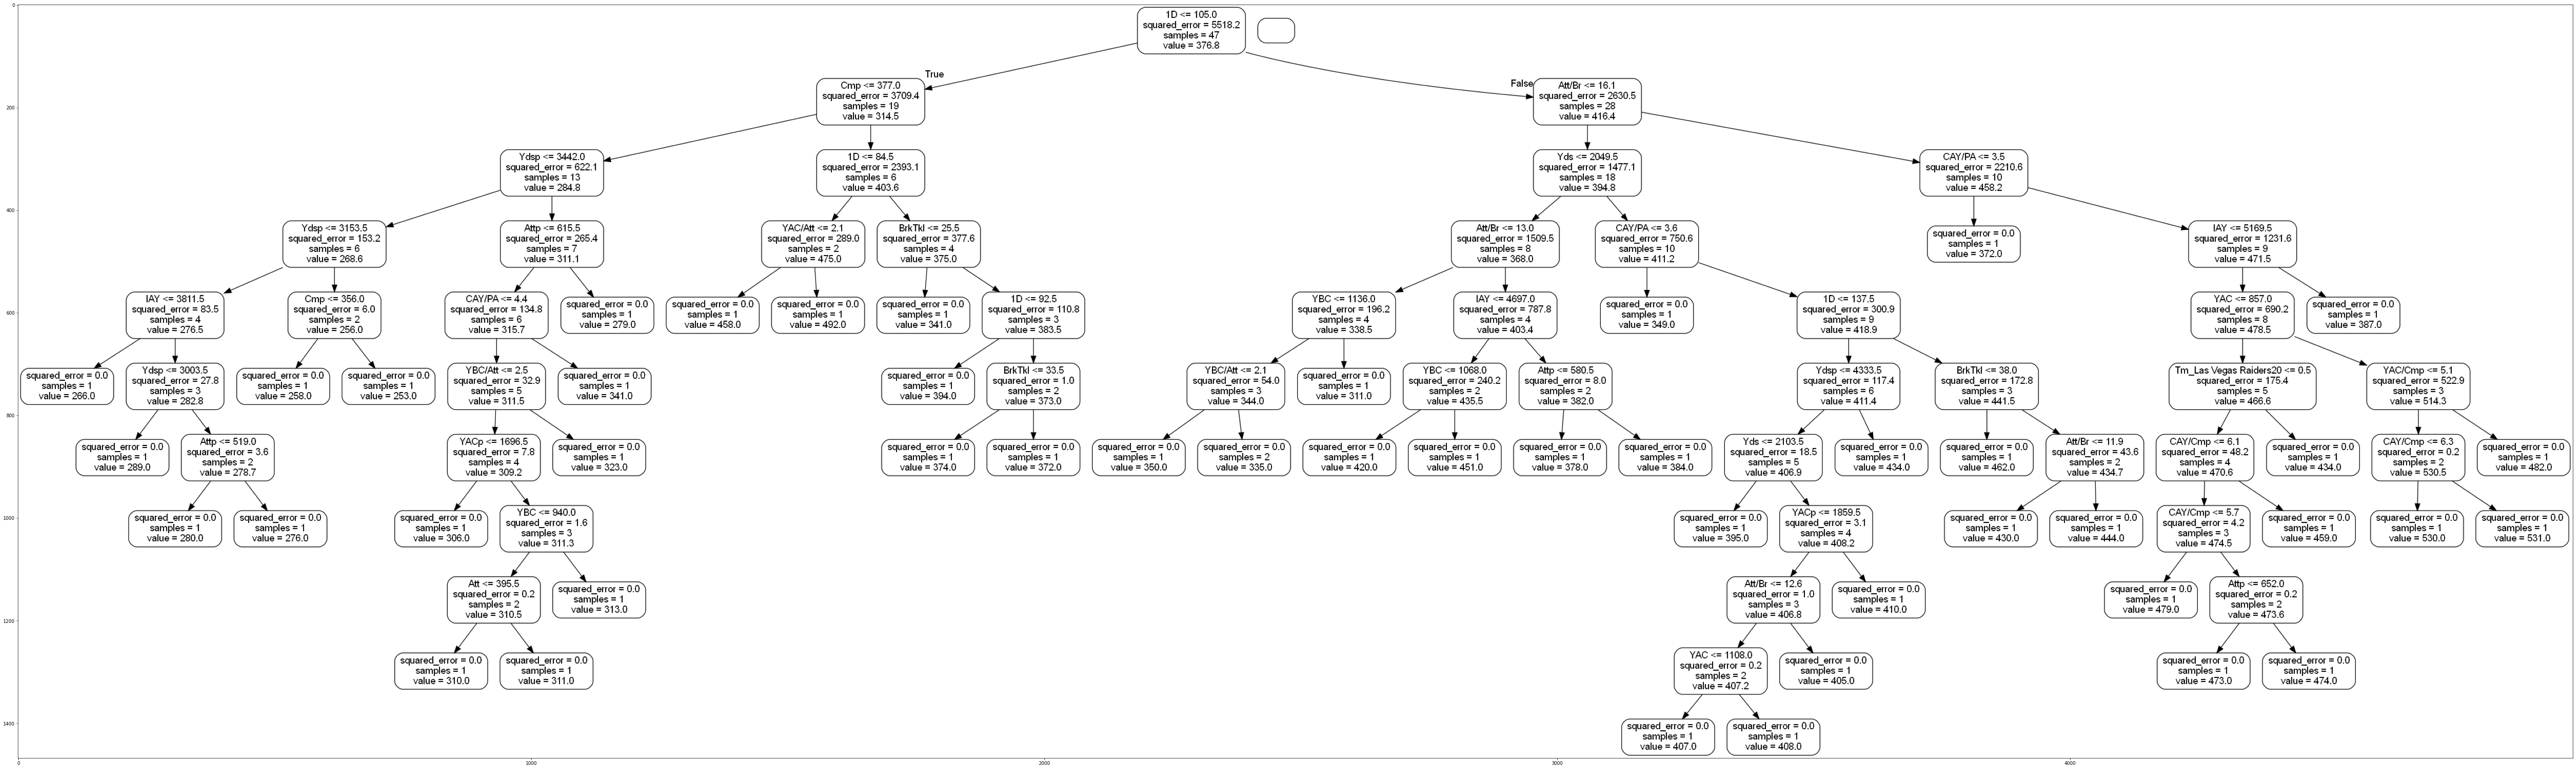

In [14]:
import matplotlib.image as mpimg
plt_1 = plt.figure(figsize=(100, 100))
img = mpimg.imread('tree.png')
imgplot = plt.imshow(img)
plt.show()

### List of Importances

Make a list of the variables and their importance in the prediction. The list is then sorted from most important to least. 

In [15]:
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(df, round(importance, 2)) for df, importance in zip(df_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: 1D                   Importance: 0.25
Variable: Ydsp                 Importance: 0.22
Variable: CAY/PA               Importance: 0.08
Variable: Att                  Importance: 0.06
Variable: Att/Br               Importance: 0.06
Variable: Yds                  Importance: 0.05
Variable: YBC                  Importance: 0.04
Variable: BrkTkl               Importance: 0.03
Variable: Cmp                  Importance: 0.03
Variable: CAY                  Importance: 0.03
Variable: YAC                  Importance: 0.02
Variable: YAC/Att              Importance: 0.02
Variable: Attp                 Importance: 0.02
Variable: IAY                  Importance: 0.02
Variable: YACp                 Importance: 0.02
Variable: YBC/Att              Importance: 0.01
Variable: IAY/PA               Importance: 0.01
Variable: CAY/Cmp              Importance: 0.01
Variable: YAC/Cmp              Importance: 0.01
Variable: PFA                  Importance: 0.0
Variable: Tm_Arizona Cardinals19 Importan